In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import re

In [3]:
#Reading Data

files_path=glob("/Users/karthikeyanmanoharan/Downloads/Activity Recognition/*.csv")

def Dataframe(files_path):
    df_participants=pd.DataFrame()
    for index,file_path in enumerate(files_path):
        df=pd.read_csv(file_path,header=None)
        df["User_id"]=int(re.sub(r'[^0-9]',"",file_path))
        df_participants=df_participants.append(df.iloc[:,1:])
    return df_participants

data=Dataframe(files_path)
data.columns=['x_acceleration','y_acceleration','z_acceleration','Label','User_id']
data.index=range(len(data))

data=data.reindex(columns=["User_id","x_acceleration","y_acceleration","z_acceleration","Label"])

In [4]:
data.shape

(1926896, 5)

In [5]:
data.head()

,User_id,x_acceleration,y_acceleration,z_acceleration,Label
0,6,1953,1979,1629,1
1,6,1950,1987,1640,1
2,6,1957,1979,1635,1
3,6,1958,1977,1639,1
4,6,1954,1981,1641,1


In [69]:
data.isnull().sum()

User_id           0
x_acceleration    0
y_acceleration    0
z_acceleration    0
Label             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926896 entries, 0 to 1926895
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   User_id         int64
 1   x_acceleration  int64
 2   y_acceleration  int64
 3   z_acceleration  int64
 4   Label           int64
dtypes: int64(5)
memory usage: 73.5 MB


In [6]:
#Converting the Label column(target) to categorical column 
data['Label']=data['Label'].astype("category")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923177 entries, 0 to 1926894
Data columns (total 5 columns):
 #   Column          Dtype   
---  ------          -----   
 0   User_id         int64   
 1   x_acceleration  int64   
 2   y_acceleration  int64   
 3   z_acceleration  int64   
 4   Label           category
dtypes: category(1), int64(4)
memory usage: 75.2 MB


In [33]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_id,1923177.0,NaN,NaN,NaN,7.511287,4.175452,1.0,4.0,7.0,11.0,15.0
x_acceleration,1923177.0,NaN,NaN,NaN,1987.478876,111.340810,282.0,1904.0,1992.0,2076.0,3828.0
y_acceleration,1923177.0,NaN,NaN,NaN,2382.299610,100.210725,2.0,2337.0,2367.0,2412.0,4095.0
z_acceleration,1923177.0,NaN,NaN,NaN,1970.488387,94.491207,1.0,1918.0,1988.0,2032.0,4095.0
Label,1923177.0,7.0,1.0,608667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Data Cleaning & EDA

In [7]:
data.User_id.value_counts()

9     166741
7     163001
1     162501
5     160001
6     140901
2     138001
8     138001
10    126801
4     122201
14    116101
12    114702
11    104451
15    103501
3     102341
13     67651
Name: User_id, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


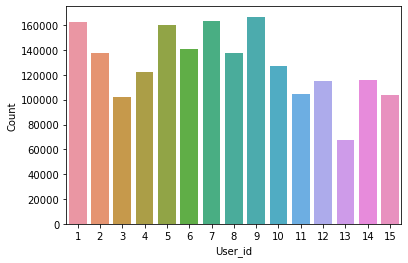

In [8]:
# Data Spread among user ID
sns.countplot("User_id",data=data)
plt.xlabel("User_id")
plt.ylabel("Count")
plt.show()

In [9]:
data.Label.value_counts().sort_values()

0      3719
6     47770
2     47878
5     51498
3    216737
4    357064
7    593563
1    608667
Name: Label, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


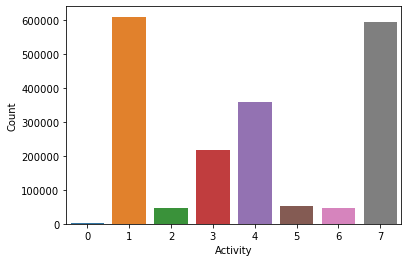

In [10]:
# Data Spread among the Label
sns.countplot("Label",data=data)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()

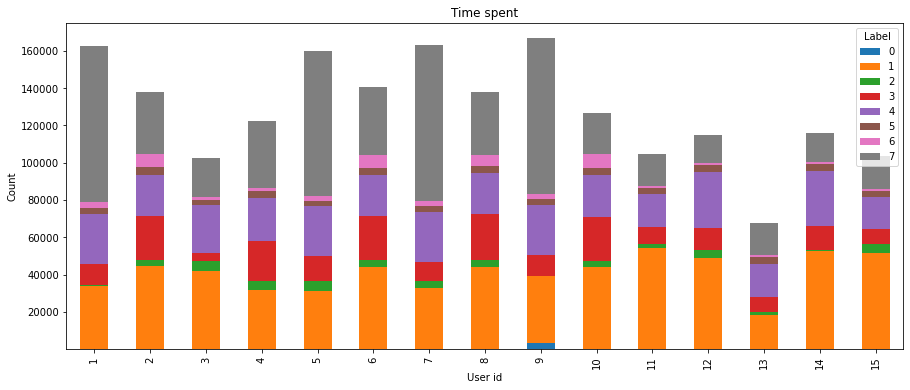

In [11]:
# User and Label data spread
x=pd.crosstab(data.User_id,data.Label)
x.style.highlight_max(axis=1,color="red").highlight_min(axis=1,color="blue")
x.plot(kind="bar",stacked=True,figsize=(15,6))
plt.title('Time spent')
plt.xlabel('User id')
plt.ylabel('Count')
plt.show()

In [ ]:
#Remove activity '0' as there is no specified Label as '0'
#This label is seen from the user '9'

In [18]:
data[data.Label == 0].shape

#There are 3719 data with unspecified label. Drop the rows

(3719, 5)

In [16]:
data.shape

(1926896, 5)

In [7]:
index = data[data.Label == 0].index
data.drop(index , inplace=True)

In [8]:
data.shape

(1923177, 5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


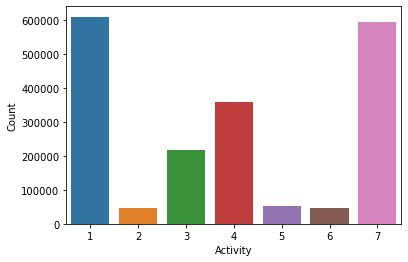

In [26]:
# Data Spread among the Label
sns.countplot("Label",data=data)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()

In [ ]:
# Data Spread Among Columns

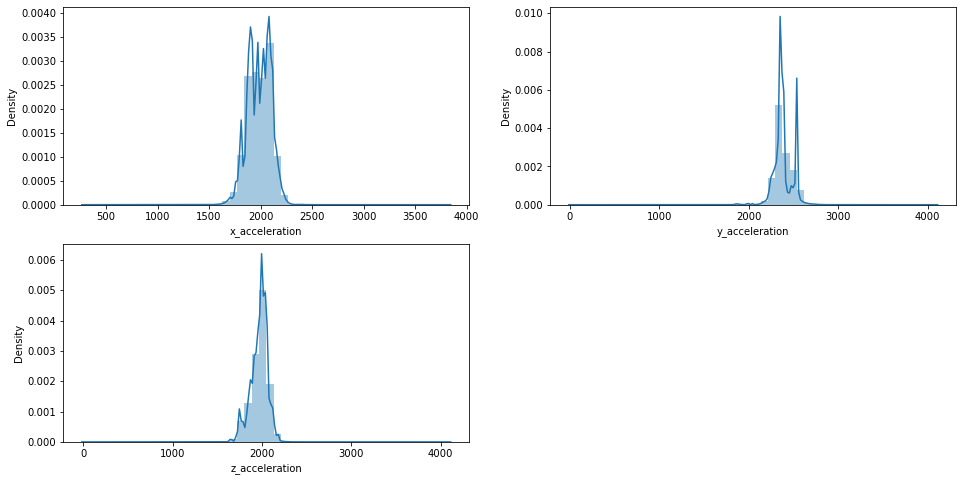

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['x_acceleration'])
plt.subplot(2,2,2)
sns.distplot(data['y_acceleration'])
plt.subplot(2,2,3)
sns.distplot(data['z_acceleration'])
plt.show()

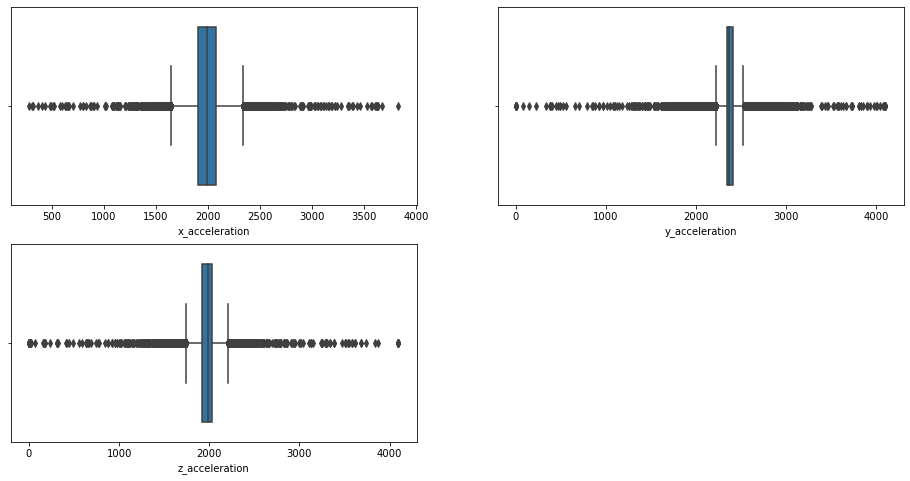

In [78]:
#Box plot to see for data spread and outliers in the columns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data['x_acceleration'])
plt.subplot(2,2,2)
sns.boxplot(data['y_acceleration'])
plt.subplot(2,2,3)
sns.boxplot(data['z_acceleration'])
plt.show()

In [84]:
data[data.x_acceleration > 3600].shape

(7, 5)

In [86]:
data[data.z_acceleration > 3600].shape

(16, 5)

In [88]:
data.shape

(1923177, 5)

In [ ]:
#Small trimming of ouliers in x and z columns (21 records)

In [9]:
index = data[data.x_acceleration > 3600].index
data.drop(index , inplace=True)

In [90]:
data.shape

(1923170, 5)

In [10]:
index = data[data.z_acceleration > 3600].index
data.drop(index , inplace=True)

In [92]:
data.shape

(1923154, 5)

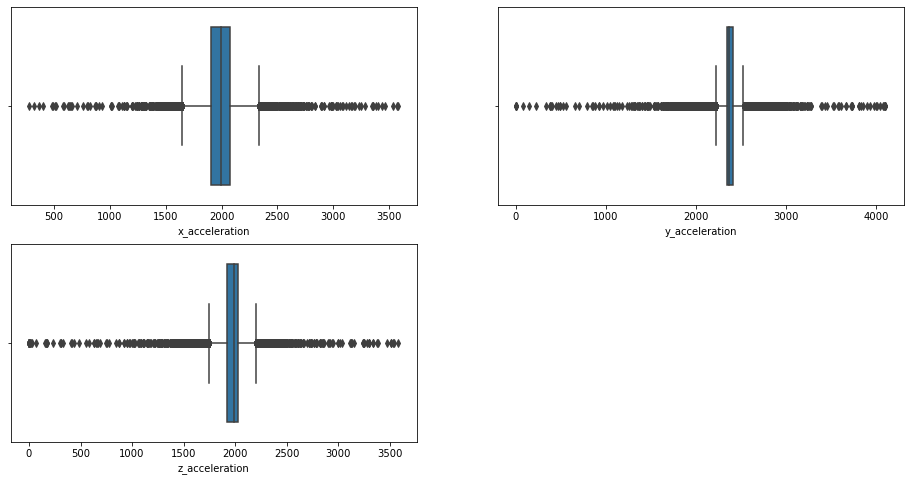

In [93]:
#Box plot after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data['x_acceleration'])
plt.subplot(2,2,2)
sns.boxplot(data['y_acceleration'])
plt.subplot(2,2,3)
sns.boxplot(data['z_acceleration'])
plt.show()

In [ ]:
# Model Building 

In [11]:
#Stratified sampling for computational limitations
df = data.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.5))

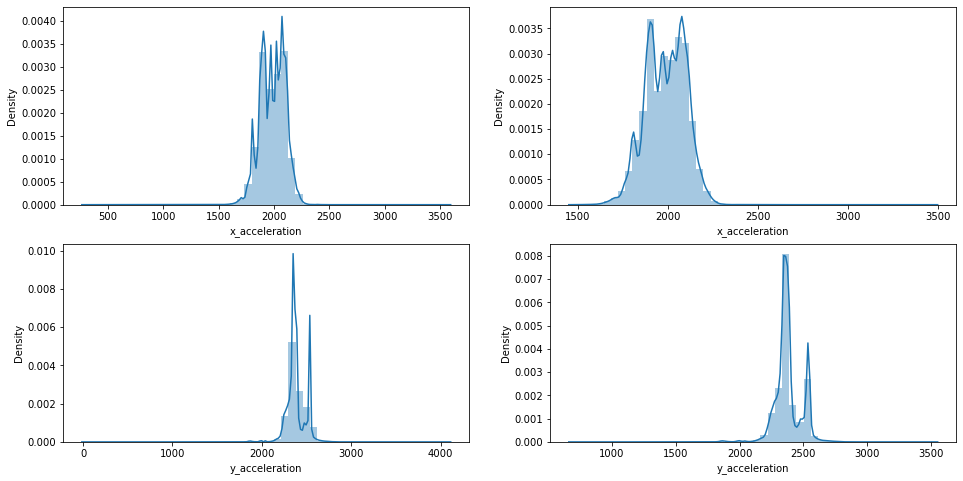

In [115]:
#comparison of actula data and sampled data spread
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['x_acceleration'])
plt.subplot(2,2,2)
sns.distplot(df['x_acceleration'])
plt.subplot(2,2,3)
sns.distplot(data['y_acceleration'])
plt.subplot(2,2,4)
sns.distplot(df['y_acceleration'])
plt.show()

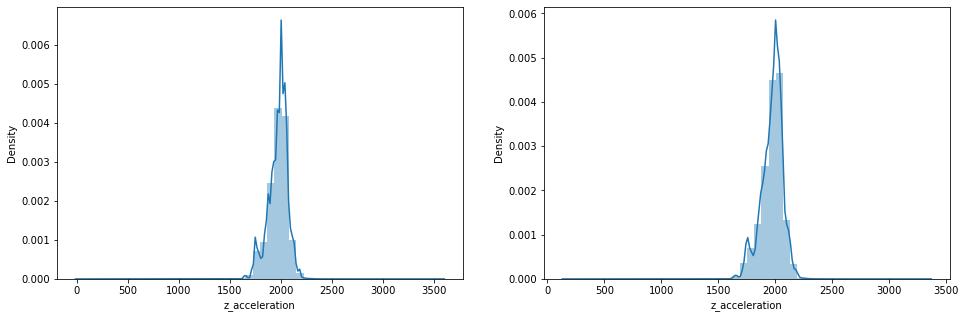

In [116]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['z_acceleration'])
plt.subplot(1,2,2)
sns.distplot(df['z_acceleration'])
plt.show()

In [ ]:
# From the above can see the distribution for Source data set and sample is maintained.
# Thus the sample depicts the population

In [124]:
X =  data.iloc[:,1:4]
y = data.loc[:,'Label']

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [120]:
#Models for comaprison
dt_full=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)
bg = BaggingClassifier(base_estimator=dt_full,random_state=0,n_estimators=100)
rf = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0)
ab = AdaBoostClassifier(n_estimators=51,random_state=0)
gb = GradientBoostingClassifier(n_estimators=90,random_state=0)
vc = VotingClassifier(estimators = [('ab',ab),('rf',rf),('gb', gb)])

In [121]:
models = []
models.append(('dt_full', dt_full))
models.append(('bg', bg))
models.append(('rf', rf))
models.append(('ab', ab))
models.append(('gb', gb))
models.append(('vc', vc))


In [122]:
X =  df.iloc[:,1:4]
y = df.loc[:,'Label']

dt_full: 0.538462 (0.137730)
bg: 0.599110 (0.141696)
rf: 0.606615 (0.147424)
ab: 0.326290 (0.174337)
gb: 0.519482 (0.167303)
vc: 0.520747 (0.187194)


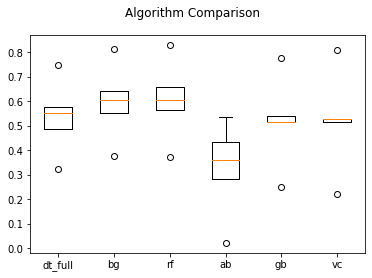

In [123]:
# model choosing based on accuracy
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Random forest performs better for the data and hence its chosen. Also random forest is not prone to outliers

In [125]:
#Base line model with no hyperparameter tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
rfc=RandomForestClassifier(n_estimators=100,random_state=10)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
rfc.fit(scaledX_train,y_train)
print("Testing Accuracy")
print(rfc.score(scaledX_test,y_test))
print("Training Accuracy")
print(rfc.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))
print("The Metrics are")
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

Testing Accuracy
0.7244475874279505
Training Accuracy
0.9560637052549751
[[109320   1228   1360   4039    144     94   5483]
 [  3750   1833    514   2042     34     27   1507]
 [  2477    214  19417   9739   1061    636   9830]
 [  5299    292   4248  51932    421    300   9237]
 [   867     24   1818   4105   1424    193   1807]
 [   457     41   1074   1767    310   2158   3677]
 [  5227    320   5449   8189    515   1411  97320]]
The Metrics are
[0.85810498 0.46381579 0.57311098 0.63476465 0.36428754 0.44781075
 0.75523238]
[0.8985107  0.1888328  0.4476645  0.72400284 0.13908967 0.22754112
 0.82174431]
[0.87784313 0.26839447 0.50267947 0.67645335 0.20131477 0.30175488
 0.78708571]


In [108]:
#Cross validation to compute Variance and Bias of the model
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scoresrf)

[0.7296173  0.72233777 0.72597754 0.72400166 0.72899334 0.72524958
 0.72410566 0.73614145 0.72553302 0.72553302]


In [137]:
#For hyperpatameter tuning sampling is done to avoid the computational limits
#sample df is used
df1 = data.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.01))

In [138]:
df1.shape

(19232, 5)

In [139]:
X =  df1.iloc[:,1:4]
y = df1.loc[:,'Label']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)



In [141]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [142]:
# Parameter grid for tuning
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [143]:
rf_Model = RandomForestClassifier()

In [144]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, 
                                   param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [145]:

rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [147]:
#Best parmeters for model building 
rf_RandomGrid.best_params_


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [12]:
df = data.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [13]:
#Building the final model with the above output
X =  df.iloc[:,1:4]
y = df.loc[:,'Label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
rfc=RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',
                           max_depth=40,bootstrap=True,random_state=10)

In [21]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

In [22]:
rfc.fit(scaledX_train,y_train)

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400, random_state=10)

In [23]:
print("Testing Accuracy")
print(rfc.score(scaledX_test,y_test))

Testing Accuracy
0.7502755880945943


In [24]:
print("Training Accuracy")
print(rfc.score(scaledX_train,y_train))

Training Accuracy
0.8163666167919601


In [ ]:
#The training and testing accuracy has increased from base line model

In [25]:
predicted = rfc.predict(scaledX_test)

In [27]:

print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

[0.86951221 0.6042654  0.63358679 0.63409016 0.43865906 0.52818129
 0.75343778]
[0.90410891 0.16142646 0.44738654 0.75473493 0.11856564 0.19128788
 0.84832199]
[0.88647314 0.25478768 0.52444994 0.68917245 0.18667476 0.28085895
 0.79806953]


In [37]:
#cross validation to have idea on the models Variance and Bias
from sklearn.model_selection import cross_val_score
scoresrf = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

In [38]:
print(scoresrf)

[0.74925579 0.74798185 0.74793958 0.74957752 0.74775759]
